In [35]:
# WeatherPy

#### Note
# Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
#Create variable for api key
api_key = weather_api_key

# Save config information.
#url = "http://api.openweathermap.org/data/2.5/weather?"

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
#units = "metric"

# Build partial query URL
#query_url = f"{url}appid={api_key}&q={city}&units={units}"




# Get weather data
weather_response = requests.get(url)
weather_json = weather_response.json()

# set up lists to hold reponse info
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
max_temp = []
wind_speed = []
country = []
city_name = []

#Initialize counters
counter = 1
sets = 0

#Start analyzing data
print('Beginning Data Retrieval')
print('-----------------------------')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json() 
        #print(response)
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_named = response['name']
        #Include a print log of each city as it's being processed with the city number and city name.
        print(f"Now processing Record {counter} of Set {sets} | {city_named}")
    
        #Reset counter
        counter = counter + 1
        
        
        #Wait one second between API calls so you do not overload limit
        time.sleep(0.1)
        count = 1 
        sets = sets + 1
        
    except:
        print("City not found. Skipping...")
    
        
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Now processing Record 1 of Set 0 | Puerto Ayora
Now processing Record 2 of Set 1 | Busselton
Now processing Record 3 of Set 2 | Iona
Now processing Record 4 of Set 3 | Tiksi
Now processing Record 5 of Set 4 | Rawson
Now processing Record 6 of Set 5 | Acajutla
Now processing Record 7 of Set 6 | Mataura
Now processing Record 8 of Set 7 | Buluang
Now processing Record 9 of Set 8 | Avarua
Now processing Record 10 of Set 9 | Norman Wells
Now processing Record 11 of Set 10 | Castro
Now processing Record 12 of Set 11 | Omboue
City not found. Skipping...
Now processing Record 13 of Set 12 | Kodiak
City not found. Skipping...
Now processing Record 14 of Set 13 | Kapaa
City not found. Skipping...
Now processing Record 15 of Set 14 | Punta Arenas
Now processing Record 16 of Set 15 | Baykit
Now processing Record 17 of Set 16 | Jamestown
Now processing Record 18 of Set 17 | Mitzic
Now processing Record 19 of Set 18 | Mount Gambier
Now processin

Now processing Record 164 of Set 163 | Havre-Saint-Pierre
Now processing Record 165 of Set 164 | Grindavik
Now processing Record 166 of Set 165 | Saldanha
Now processing Record 167 of Set 166 | Seydi
Now processing Record 168 of Set 167 | Kimberley
Now processing Record 169 of Set 168 | Lingyuan
Now processing Record 170 of Set 169 | Pacific Grove
Now processing Record 171 of Set 170 | Nautla
Now processing Record 172 of Set 171 | Lekoni
Now processing Record 173 of Set 172 | Shediac
Now processing Record 174 of Set 173 | Port Macquarie
Now processing Record 175 of Set 174 | Ust-Kuyga
Now processing Record 176 of Set 175 | Adrar
Now processing Record 177 of Set 176 | Olafsvik
Now processing Record 178 of Set 177 | Taixing
Now processing Record 179 of Set 178 | Tautira
Now processing Record 180 of Set 179 | Bela
Now processing Record 181 of Set 180 | Viedma
Now processing Record 182 of Set 181 | Lebu
Now processing Record 183 of Set 182 | Kondinskoye
Now processing Record 184 of Set 183

Now processing Record 328 of Set 327 | Ouesso
Now processing Record 329 of Set 328 | Pundaguitan
Now processing Record 330 of Set 329 | Shelton
Now processing Record 331 of Set 330 | Angoram
Now processing Record 332 of Set 331 | Bandarbeyla
Now processing Record 333 of Set 332 | Longyearbyen
Now processing Record 334 of Set 333 | Beringovskiy
Now processing Record 335 of Set 334 | Darnah
Now processing Record 336 of Set 335 | Rome
Now processing Record 337 of Set 336 | Poum
Now processing Record 338 of Set 337 | Nakhon Thai
Now processing Record 339 of Set 338 | Porbandar
Now processing Record 340 of Set 339 | Glen Allen
Now processing Record 341 of Set 340 | Mahebourg
Now processing Record 342 of Set 341 | Metaxades
Now processing Record 343 of Set 342 | Gayeri
Now processing Record 344 of Set 343 | Bariloche
Now processing Record 345 of Set 344 | Itarema
Now processing Record 346 of Set 345 | Zhigansk
City not found. Skipping...
Now processing Record 347 of Set 346 | Tefe
Now proces

Now processing Record 492 of Set 491 | Veraval
Now processing Record 493 of Set 492 | Bambous Virieux
Now processing Record 494 of Set 493 | Presidente Epitacio
Now processing Record 495 of Set 494 | Lakefield
Now processing Record 496 of Set 495 | La Ronge
Now processing Record 497 of Set 496 | Mahibadhoo
Now processing Record 498 of Set 497 | Manbij
Now processing Record 499 of Set 498 | Pyaozerskiy
Now processing Record 500 of Set 499 | Lobito
Now processing Record 501 of Set 500 | Cayenne
Now processing Record 502 of Set 501 | Coruripe
Now processing Record 503 of Set 502 | Alanya
Now processing Record 504 of Set 503 | Sakakah
Now processing Record 505 of Set 504 | Danielskuil
Now processing Record 506 of Set 505 | Comodoro Rivadavia
Now processing Record 507 of Set 506 | Praia
Now processing Record 508 of Set 507 | Te Anau
Now processing Record 509 of Set 508 | Nouadhibou
Now processing Record 510 of Set 509 | Arrondissement de Pontivy
Now processing Record 511 of Set 510 | Ocampo

In [39]:
#Create dataframe of response data so that you can graph it accordingly
weather_df = pd.DataFrame({"City Name": city_name, "Latitude": lat, "Longitude": lng, "Temprature": temp, "Humidity":humidity, "Cloudiness": cloudiness, "Max Temp":max_temp,"Wind Speed": wind_speed})
#Display the DataFrame
weather_df.head()

,City Name,Latitude,Longitude,Temprature,Humidity,Cloudiness,Max Temp,Wind Speed
0,Puerto Ayora,-0.74,-90.35,79.72,69,20,82.40,10.29
1,Busselton,-33.65,115.33,70.23,32,1,73.00,15.23
2,Iona,26.52,-81.96,71.47,56,40,75.20,17.22
3,Tiksi,71.69,128.87,-16.83,88,29,-16.83,11.86
4,Rawson,-43.30,-65.10,75.92,41,54,75.92,21.00


In [40]:
### Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Save data frame to CSV
weather_df.to_csv(index=False)
weather_df.to_csv('city_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

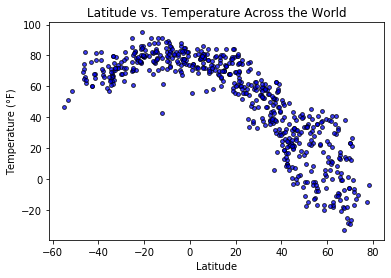

The plot above is analyzing the maximum temperature of each country based on its latitude. According to the plot above, the farther the location from the equator or zero degrees, the more extreme the temperatures are.


In [41]:
#Create a scatter plot of lattitude vs. temperature:

latitude = weather_df['Latitude']
temperature = weather_df['Temprature']
plt.scatter(latitude, temperature, marker="o", facecolors="blue", edgecolors="black",
            s=15, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Temperature (°F)')
plt.title('Latitude vs. Temperature Across the World')
plt.savefig("LatVsTemp.png")
plt.show()

print('The plot above is analyzing the maximum temperature of each country based on its latitude. According to the plot above, the farther the location from the equator or zero degrees, the more extreme the temperatures are.')

#### Latitude vs. Humidity Plot

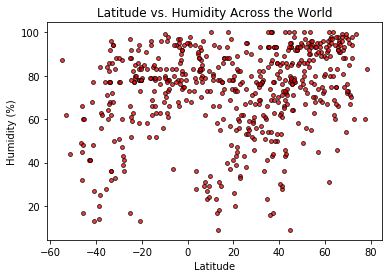

The plot above is analyzing the average humidity of each country based on its latitude. There does not appear to be a pattern between lattitude and humidity.


In [42]:
#Create a scatter plot of lattitude vs. humidity:

humidity = weather_df['Humidity']
plt.scatter(latitude, humidity, marker="o", facecolors="red", edgecolors="black",
            s=15, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity Across the World')
plt.savefig("LatVsHumidity.png")
plt.show()

print('The plot above is analyzing the average humidity of each country based on its latitude. There does not appear to be a pattern between lattitude and humidity.')

#### Latitude vs. Cloudiness Plot

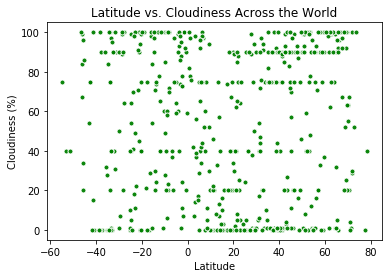

The plot above is analyzing the average cloudiness of each country based on its latitude. There does not appear to be a pattern between lattitude and cloudiness.


In [43]:
#Create a scatter plot of lattitude vs. cloudiness:

cloudiness = weather_df['Cloudiness']
plt.scatter(latitude, cloudiness, marker="o", facecolors="g", edgecolors="white",
            s=25, alpha=0.95)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness Across the World')
plt.savefig("LatVsCloudiness.png")
plt.show()

print('The plot above is analyzing the average cloudiness of each country based on its latitude. There does not appear to be a pattern between lattitude and cloudiness.')

#### Latitude vs. Wind Speed Plot

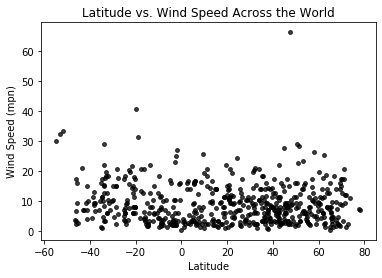

The plot above is analyzing the average wind speed of each country based on its latitude. There does not appear to be a pattern between lattitude and wind speed.


In [44]:
#Create a scatter plot of lattitude vs. wind speed:

wind_speed = weather_df['Wind Speed']
plt.scatter(latitude, wind_speed, marker="o", facecolors="black",
            s=15, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mpn)')
plt.title('Latitude vs. Wind Speed Across the World')
plt.savefig("LatVsWind.png")
plt.show()

print('The plot above is analyzing the average wind speed of each country based on its latitude. There does not appear to be a pattern between lattitude and wind speed.')

## Linear Regression

In [45]:
# OPTIONAL: Create a function to create Linear Regression plots


In [46]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = weather_df.loc[weather_df['Latitude'] >= 0.0]
northern_hemisphere_df

southern_hemisphere_df = weather_df.loc[weather_df['Latitude'] < 0.0]
southern_hemisphere_df

,City Name,Latitude,Longitude,Temprature,Humidity,Cloudiness,Max Temp,Wind Speed
0,Puerto Ayora,-0.74,-90.35,79.72,69,20,82.40,10.29
1,Busselton,-33.65,115.33,70.23,32,1,73.00,15.23
4,Rawson,-43.30,-65.10,75.92,41,54,75.92,21.00
6,Mataura,-46.19,168.86,71.08,45,99,71.08,2.21
8,Avarua,-21.21,-159.78,84.20,83,100,84.20,12.75
...,...,...,...,...,...,...,...,...
554,Manggar,-2.88,108.27,81.36,78,1,81.36,5.86
558,Coyhaique,-45.58,-72.07,64.40,48,20,64.40,9.17
562,Neuquen,-38.95,-68.06,82.17,20,0,82.17,4.25
564,Amahai,-3.33,128.92,82.83,76,86,82.83,10.25


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

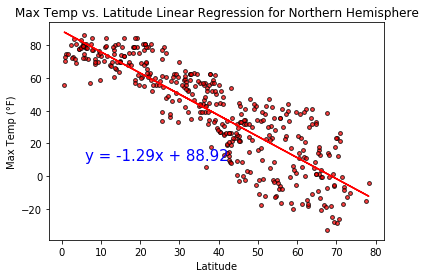

In [47]:
#Complete Max Temp vs. Latitude Linear Regression for Northern Hemisphere
latitude = northern_hemisphere_df['Latitude']
max_temp = northern_hemisphere_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, max_temp)

regress_values = latitude * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude,max_temp, marker="o", facecolors="red", edgecolors="black",
            s=15, alpha=0.75)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title('Max Temp vs. Latitude Linear Regression for Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (°F)')
plt.savefig('NorthernHemMaxTemp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.32x + 82.77


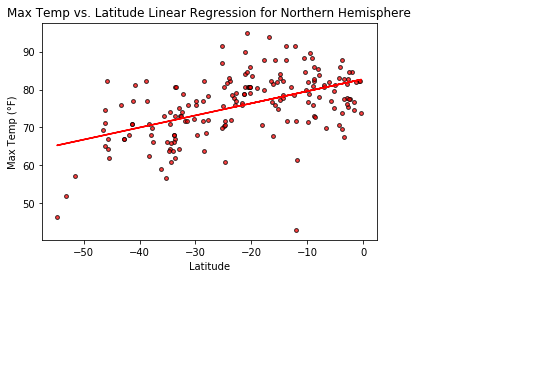

In [81]:
#Complete Max Temp vs. Latitude Linear Regression for Southern Hemisphere
latitude_south = southern_hemisphere_df['Latitude']
max_temp_south = southern_hemisphere_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_south, max_temp_south)

regress_values = latitude_south * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_south,max_temp_south, marker="o", facecolors="red", edgecolors="black",
            s=15, alpha=0.75)
plt.plot(latitude_south,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
print(line_eq)
plt.title('Max Temp vs. Latitude Linear Regression for Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (°F)')
plt.savefig('SouthernHemMaxTemp.png')
plt.show()

In [63]:
#After each pair of plots explain what the linear regression is modelling such as any relationships you notice 
#and any other analysis you may have.
print("There appears to be correlation between the country's latitude and max temperature. In the graph of the Northern Hemisphere, we can see that higher the latitude, the colder the country. The similar is true in the Southern Hemisphere that the lower the latitude, the colder the temperature. The graphs show that the closer a country is to the equator, the warmer the max temperature.")

There appears to be correlation between the country's latitude and max temperature. In the graph of the Northern Hemisphere, we can see that higher the latitude, the colder the country. The similar is true in the Southern Hemisphere that the lower the latitude, the colder the temperature. The graphs show that the closer a country is to the equator, the warmer the max temperature.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.3x + 62.75


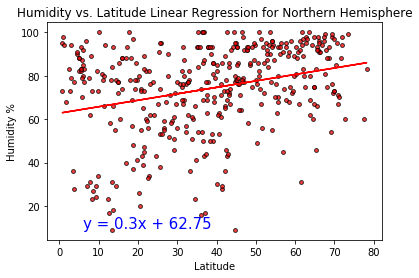

In [80]:
#Complete Humidity vs. Latitude Linear Regression for Northern Hemisphere
humidity = northern_hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity)

regress_values = latitude * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude,humidity, marker="o", facecolors="red", edgecolors="black",
            s=15, alpha=0.75)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
print(line_eq)
plt.title('Humidity vs. Latitude Linear Regression for Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.savefig('NorthernHemHumidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.69x + 85.79


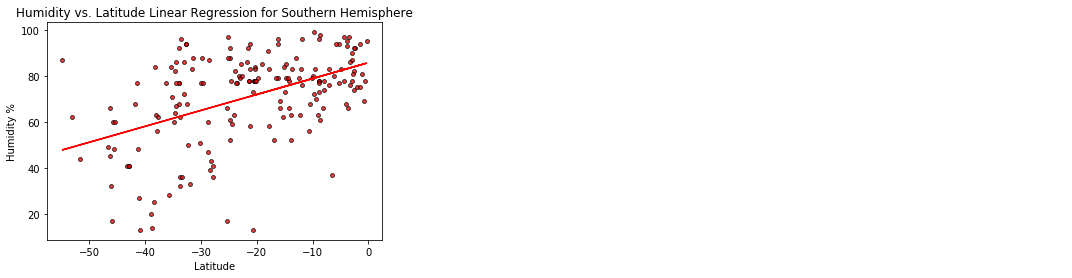

In [86]:
#Complete Humidity vs. Latitude Linear Regression for Southern Hemisphere
humidity_south = southern_hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_south, humidity_south)

regress_values = latitude_south * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_south,humidity_south, marker="o", facecolors="red", edgecolors="black",
            s=15, alpha=0.75)
plt.plot(latitude_south,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="blue")
print(line_eq)
plt.title('Humidity vs. Latitude Linear Regression for Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.savefig('SouthernHemHumidity.png')
plt.show()

In [69]:
#After each pair of plots explain what the linear regression is modelling such as any relationships you notice 
#and any other analysis you may have.
print('There appears to be some correlation between the distance from the equator and humidity across the world. In the Northern Hemisphere, it appears that the farther from the equator, the more humid the country. However, in the Southern Hempisphere it appears that the closer to the equator, the more humid the country.')

There appears to be some correlation between the distance from the equator and humidity across the world. In the Northern Hemisphere, it appears that the farther from the equator, the more humid the country. However, in the Southern Hempisphere it appears that the closer to the equator, the more humid the country.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

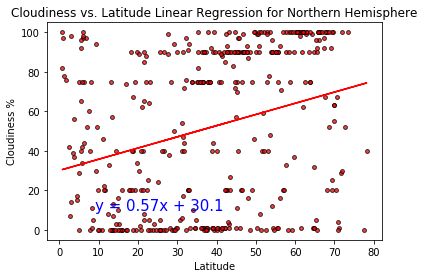

In [73]:
#Complete Cloudiness vs. Latitude Linear Regression for Northern Hemisphere
cloudiness = northern_hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness)

regress_values = latitude * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude,cloudiness, marker="o", facecolors="red", edgecolors="black",
            s=15, alpha=0.75)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(9,10),fontsize=15,color="blue")
plt.title('Cloudiness vs. Latitude Linear Regression for Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.savefig('NorthernHemCloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

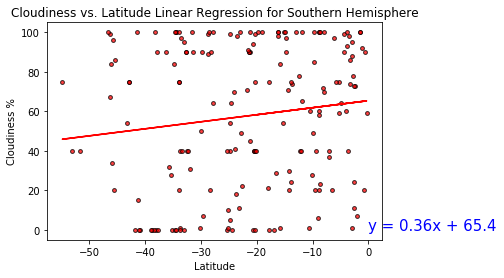

In [83]:
#Complete Cloudiness vs. Latitude Linear Regression for Southern Hemisphere
cloudiness_south = southern_hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_south, cloudiness_south)

regress_values = latitude_south * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_south,cloudiness_south, marker="o", facecolors="red", edgecolors="black",
            s=15, alpha=0.75)
plt.plot(latitude_south,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="blue")
plt.title('Cloudiness vs. Latitude Linear Regression for Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.savefig('SouthernHemCloudiness.png')
plt.show()

In [ ]:
#After each pair of plots explain what the linear regression is modelling such as any relationships you notice 
#and any other analysis you may have.
print('When looking at the graphs for latitude vs cloudiness, there does not appear to be any sort of correlation.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

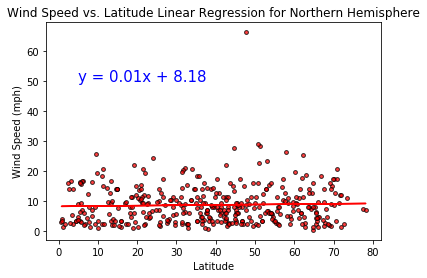

In [95]:
#Complete Wind Speed vs. Latitude Linear Regression for Northern Hemisphere
wind_speed = northern_hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed)

regress_values = latitude * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude,wind_speed, marker="o", facecolors="red", edgecolors="black",
            s=15, alpha=0.75)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(5,50),fontsize=15,color="blue")
plt.title('Wind Speed vs. Latitude Linear Regression for Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('NorthernHemWindSpeed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

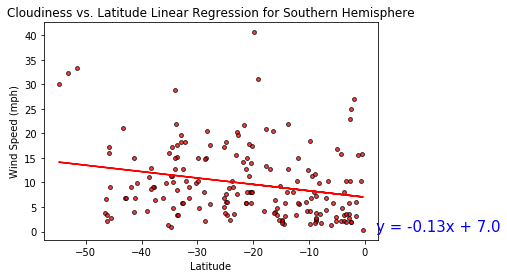

In [96]:
#Complete Wind Speed vs. Latitude Linear Regression for Southern Hemisphere
wind_speed_south = southern_hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_south, wind_speed_south)

regress_values = latitude_south * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_south,wind_speed_south, marker="o", facecolors="red", edgecolors="black",
            s=15, alpha=0.75)
plt.plot(latitude_south,regress_values,"r-")
plt.annotate(line_eq,(2,0),fontsize=15,color="blue")
plt.title('Cloudiness vs. Latitude Linear Regression for Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('SouthernHemWindSpeed.png')
plt.show()

In [97]:
#After each pair of plots explain what the linear regression is modelling such as any relationships you notice 
#and any other analysis you may have.
print('The correlation of wind speed appears to be stronger in the Northern Hemisphere. The linear regression in the Northern Hemisphere shows that it does not matter how close the country is to the equator, the wind speeds will all be about the same. However, in the Southern Hemisphere the wind speed decreases in the countries closer to the equator.' )

The correlation of wind speed appears to be stronger in the Northern Hemisphere. The linear regression in the Northern Hemisphere shows that it does not matter how close the country is to the equator, the wind speeds will all be about the same. However, in the Southern Hemisphere the wind speed decreases in the countries closer to the equator.
